In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('wine_data.csv',header=None ,usecols =[0,1,2])
df.columns =['Class label', 'Alcohol' , 'Malic acid ']
# here we added the columns in the dataframe

In [4]:
df.sample(5)

,Class label,Alcohol,Malic acid
59,2,12.37,0.94
86,2,12.16,1.61
101,2,12.60,1.34
33,1,13.76,1.53
26,1,13.39,1.77


In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


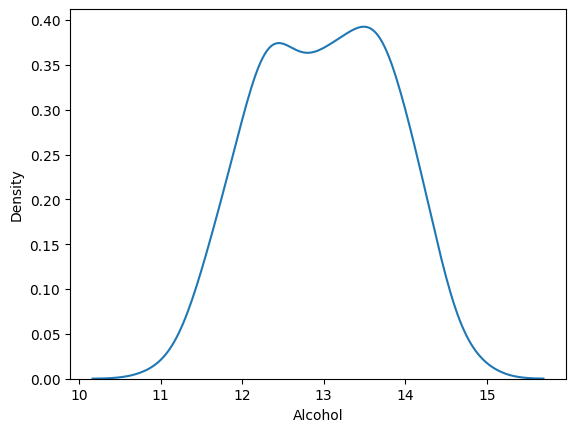

In [6]:
sns.kdeplot(df['Alcohol'])  # pdf
plt.show()

In [7]:
sns.kdeplot(df['Malic acid'])  # pdf
plt.show()

KeyError: 'Malic acid'

In [8]:
color_dict = {1:'red',3:'green',2:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue = df['Class label'],palette = color_dict)

KeyError: 'Malic acid'

In [14]:
# we train and split befor making the model
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(df.drop('Class label',axis = 1),df['Class label'],test_size = 0.3,random_state = 0)
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform trian and  test sets 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
# here the this transform data get in the numpy array and we can converted into the dataframe 
x_train_scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [22]:
# here we get the data in numpy array
x_test_scaled 

array([[ 0.72849462,  0.16386555],
       [ 0.47311828,  0.37394958],
       [ 0.36021505,  0.05042017],
       [ 0.68010753,  0.17647059],
       [ 0.54301075,  1.03151261],
       [ 0.14247312,  0.24369748],
       [ 0.81451613,  0.26470588],
       [ 0.35752688,  0.61764706],
       [ 0.32795699,  0.17647059],
       [ 0.28225806,  0.19747899],
       [ 0.62634409,  0.35084034],
       [ 0.76612903,  0.87184874],
       [ 0.85215054,  0.18277311],
       [ 0.36021505,  0.03781513],
       [ 0.68548387,  0.35504202],
       [ 0.26075269,  0.00630252],
       [ 0.73387097,  0.13445378],
       [ 0.84946237,  0.14705882],
       [ 0.4327957 ,  0.0987395 ],
       [ 0.75268817,  0.15966387],
       [ 0.55913978,  0.02521008],
       [ 0.54301075,  0.15966387],
       [ 0.59408602,  0.35714286],
       [ 0.39784946,  0.17647059],
       [ 0.34946237,  0.04411765],
       [ 0.40053763,  0.32352941],
       [ 0.37634409,  0.13445378],
       [ 0.30376344,  0.1512605 ],
       [ 0.19623656,

In [25]:
# now converting the numpy array into the datafrome 
x_train_scaled  = pd.DataFrame(x_train_scaled, columns=x_train.columns )
x_test_scaled  = pd.DataFrame(x_test_scaled, columns=x_test.columns )

In [29]:
# here we now dataframe for both train and test 
x_train_scaled.head()

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [28]:
x_test_scaled.head()

,Alcohol,Malic acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513


In [32]:
# here we not done the scaling 
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [34]:
# here we done the scaleing 
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


KeyError: 'Malic acid'

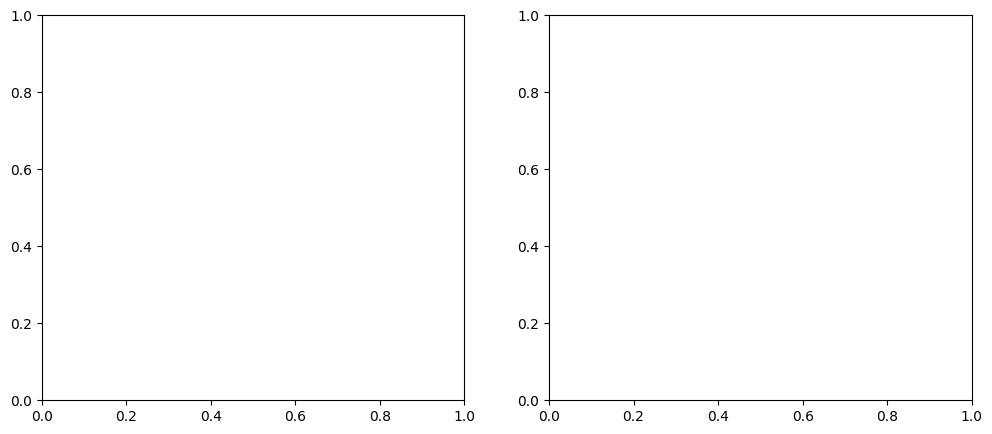

In [35]:
fig,(ax1 ,ax2) = plt.subplots(ncols = 2 ,figsize = (12,5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c = y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c = y_train )
ax2.set_title("After Scaling")
plt.show()